Coursera Captstone Project

In [142]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [143]:
#Using Bandra,Mumbai as the location and finding out its coordinates
address = 'Houston, Texas, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

29.7589382 -95.3676974


In [144]:
#Searching an area within 10kms
search_query = 'Indian Restaurant'
radius = 10000
print(search_query + ' .... OK!')

Indian Restaurant .... OK!


In [145]:
#Foursqaure API credentitals
CLIENT_ID = 'WSGPSOPIBK50UKK0N0AP5QOZBQSN2J5WUBW3DYMENGCI0M45' # your Foursquare ID
CLIENT_SECRET = 'T10G0RCOH53RYG3WROR4CYJII3ASBYTOENMC4MQGA0NUR1M5' # your Foursquare Secret
VERSION = '20190801'
LIMIT = 30

In [146]:
#Address and search using Foursqaure API URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WSGPSOPIBK50UKK0N0AP5QOZBQSN2J5WUBW3DYMENGCI0M45&client_secret=T10G0RCOH53RYG3WROR4CYJII3ASBYTOENMC4MQGA0NUR1M5&ll=29.7589382,-95.3676974&v=20190801&query=Indian Restaurant&radius=10000&limit=30'

In [147]:
#Storing the requests in variable results
results = requests.get(url).json()

In [148]:
#Assigning the relevant part of JSON to venues
venues = results['response']['venues']
df = pd.json_normalize(venues)
df

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,venuePage.id
0,4b2fc9fff964a520f9ef24e3,Shiva Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1592957405,False,2514 Times Blvd,29.716593,-95.417313,"[{'label': 'display', 'lat': 29.71659272052966...",6724,...,United States,"[2514 Times Blvd, Houston, TX 77005, United St...",546071,https://www.grubhub.com/restaurant/shiva-india...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,4cc379573d7fa1cd4f08a65f,Spindletop Restaurant at Hyatt Regency Houston,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",v-1592957405,False,1200 Louisiana St,29.756949,-95.369097,"[{'label': 'display', 'lat': 29.75694904720969...",259,...,United States,"[1200 Louisiana St (Polk), Houston, TX 77002, ...",NaN,NaN,NaN,NaN,NaN,NaN,Polk,37539644
2,4b6a250ef964a52018ca2be3,Andalucia Tapas Restaurant and Bar,"[{'id': '4bf58dd8d48988d150941735', 'name': 'S...",v-1592957405,False,1204 Caroline Street,29.753929,-95.364056,"[{'label': 'display', 'lat': 29.7539291, 'lng'...",659,...,United States,"[1204 Caroline Street, Houston, TX 77002, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5cb69b77fb8e59002cb39b50,Flavors Indian Fast Food,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1592957405,False,808 Travis St,29.758804,-95.365334,"[{'label': 'display', 'lat': 29.75880432128906...",228,...,United States,"[808 Travis St, Houston, TX 77002, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4c4e40e851c2c9288b120f9e,Chutney's Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1592957405,False,NaN,29.755496,-95.364476,"[{'label': 'display', 'lat': 29.75549581409402...",493,...,United States,"[Houston, TX 77002, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4f320ef019833175d60c5e24,Chin Tao Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1592957405,False,1122 Travis St,29.756623,-95.367124,"[{'label': 'display', 'lat': 29.75662299999999...",263,...,United States,"[1122 Travis St, Houston, TX 77002, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4bc1004c4cdfc9b666f29321,Indian Summer Lodge,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",v-1592957405,False,605 Columbia St,29.782040,-95.393309,"[{'label': 'display', 'lat': 29.78204000000000...",3569,...,United States,"[605 Columbia St, Houston, TX 77007, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4aef7d79f964a520d1d821e3,Kim Son Restaurant - Downtown,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1592957405,False,2001 Jefferson St,29.745905,-95.360474,"[{'label': 'display', 'lat': 29.74590544366447...",1610,...,United States,"[2001 Jefferson St (Chartres), Houston, TX 770...",504484,https://www.grubhub.com/restaurant/kim-son-res...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,Chartres,NaN
8,57c07814498e34ec23cc31d0,Rice & Spice Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1592957405,False,NaN,29.755026,-95.362142,"[{'label': 'display', 'lat': 29.755026, 'lng':...",691,...,United States,"[Texas, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4fcfcc59108174aac005f032,Cuchara Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1592957405,False,214 Fairview St,29.748292,-95.385546,"[{'label': 'display', 'lat': 29.74829203379039...",2092,...,United States,"[214 Fairview St (Taft), Houston, TX 77006, Un...",1579364,https://www.grubhub.com/restaurant/cuchara-214...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,Taft,48130042


In [149]:
#Keeping only columns that include venue name and other fields related to the location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df2 = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df2['categories'] = df2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df2.columns = [column.split('.')[-1] for column in df2.columns]

df2

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Shiva Indian Restaurant,Indian Restaurant,2514 Times Blvd,29.716593,-95.417313,"[{'label': 'display', 'lat': 29.71659272052966...",6724,77005,US,Houston,TX,United States,"[2514 Times Blvd, Houston, TX 77005, United St...",NaN,4b2fc9fff964a520f9ef24e3
1,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,1200 Louisiana St,29.756949,-95.369097,"[{'label': 'display', 'lat': 29.75694904720969...",259,77002,US,Houston,TX,United States,"[1200 Louisiana St (Polk), Houston, TX 77002, ...",Polk,4cc379573d7fa1cd4f08a65f
2,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,1204 Caroline Street,29.753929,-95.364056,"[{'label': 'display', 'lat': 29.7539291, 'lng'...",659,77002,US,Houston,TX,United States,"[1204 Caroline Street, Houston, TX 77002, Unit...",NaN,4b6a250ef964a52018ca2be3
3,Flavors Indian Fast Food,Fast Food Restaurant,808 Travis St,29.758804,-95.365334,"[{'label': 'display', 'lat': 29.75880432128906...",228,77002,US,Houston,TX,United States,"[808 Travis St, Houston, TX 77002, United States]",NaN,5cb69b77fb8e59002cb39b50
4,Chutney's Indian Cuisine,Indian Restaurant,NaN,29.755496,-95.364476,"[{'label': 'display', 'lat': 29.75549581409402...",493,77002,US,Houston,TX,United States,"[Houston, TX 77002, United States]",NaN,4c4e40e851c2c9288b120f9e
5,Chin Tao Chinese Restaurant,Chinese Restaurant,1122 Travis St,29.756623,-95.367124,"[{'label': 'display', 'lat': 29.75662299999999...",263,77002,US,Houston,TX,United States,"[1122 Travis St, Houston, TX 77002, United Sta...",NaN,4f320ef019833175d60c5e24
6,Indian Summer Lodge,Event Space,605 Columbia St,29.782040,-95.393309,"[{'label': 'display', 'lat': 29.78204000000000...",3569,77007,US,Houston,TX,United States,"[605 Columbia St, Houston, TX 77007, United St...",NaN,4bc1004c4cdfc9b666f29321
7,Kim Son Restaurant - Downtown,Vietnamese Restaurant,2001 Jefferson St,29.745905,-95.360474,"[{'label': 'display', 'lat': 29.74590544366447...",1610,77003,US,Houston,TX,United States,"[2001 Jefferson St (Chartres), Houston, TX 770...",Chartres,4aef7d79f964a520d1d821e3
8,Rice & Spice Indian Cuisine,Indian Restaurant,NaN,29.755026,-95.362142,"[{'label': 'display', 'lat': 29.755026, 'lng':...",691,NaN,US,NaN,Texas,United States,"[Texas, United States]",NaN,57c07814498e34ec23cc31d0
9,Cuchara Restaurant,Mexican Restaurant,214 Fairview St,29.748292,-95.385546,"[{'label': 'display', 'lat': 29.74829203379039...",2092,77006,US,Houston,TX,United States,"[214 Fairview St (Taft), Houston, TX 77006, Un...",Taft,4fcfcc59108174aac005f032


In [150]:
#extracting venue id from dataset
venue_id_list=df2['id']

In [151]:
#Extracting the number of likes for each venue

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[61, 52, 78, 0, 0, 0, 0, 161, 1, 154, 23, 0, 0, 0, 0, 0, 16, 0, 3, 4, 66, 10, 0, 0, 0, 0, 0, 183, 2, 22]


In [152]:
like_list2=pd.DataFrame(like_list)
like_list2.rename(columns = {0:'Like'}, inplace=True)
like_list2

,Like
0,61
1,52
2,78
3,0
4,0
5,0
6,0
7,161
8,1
9,154


In [153]:
#Adding the 'Like' column to main dataset
df3 = pd.concat([df2, like_list2], axis = 1)
df3

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,Like
0,Shiva Indian Restaurant,Indian Restaurant,2514 Times Blvd,29.716593,-95.417313,"[{'label': 'display', 'lat': 29.71659272052966...",6724,77005,US,Houston,TX,United States,"[2514 Times Blvd, Houston, TX 77005, United St...",NaN,4b2fc9fff964a520f9ef24e3,61
1,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,1200 Louisiana St,29.756949,-95.369097,"[{'label': 'display', 'lat': 29.75694904720969...",259,77002,US,Houston,TX,United States,"[1200 Louisiana St (Polk), Houston, TX 77002, ...",Polk,4cc379573d7fa1cd4f08a65f,52
2,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,1204 Caroline Street,29.753929,-95.364056,"[{'label': 'display', 'lat': 29.7539291, 'lng'...",659,77002,US,Houston,TX,United States,"[1204 Caroline Street, Houston, TX 77002, Unit...",NaN,4b6a250ef964a52018ca2be3,78
3,Flavors Indian Fast Food,Fast Food Restaurant,808 Travis St,29.758804,-95.365334,"[{'label': 'display', 'lat': 29.75880432128906...",228,77002,US,Houston,TX,United States,"[808 Travis St, Houston, TX 77002, United States]",NaN,5cb69b77fb8e59002cb39b50,0
4,Chutney's Indian Cuisine,Indian Restaurant,NaN,29.755496,-95.364476,"[{'label': 'display', 'lat': 29.75549581409402...",493,77002,US,Houston,TX,United States,"[Houston, TX 77002, United States]",NaN,4c4e40e851c2c9288b120f9e,0
5,Chin Tao Chinese Restaurant,Chinese Restaurant,1122 Travis St,29.756623,-95.367124,"[{'label': 'display', 'lat': 29.75662299999999...",263,77002,US,Houston,TX,United States,"[1122 Travis St, Houston, TX 77002, United Sta...",NaN,4f320ef019833175d60c5e24,0
6,Indian Summer Lodge,Event Space,605 Columbia St,29.782040,-95.393309,"[{'label': 'display', 'lat': 29.78204000000000...",3569,77007,US,Houston,TX,United States,"[605 Columbia St, Houston, TX 77007, United St...",NaN,4bc1004c4cdfc9b666f29321,0
7,Kim Son Restaurant - Downtown,Vietnamese Restaurant,2001 Jefferson St,29.745905,-95.360474,"[{'label': 'display', 'lat': 29.74590544366447...",1610,77003,US,Houston,TX,United States,"[2001 Jefferson St (Chartres), Houston, TX 770...",Chartres,4aef7d79f964a520d1d821e3,161
8,Rice & Spice Indian Cuisine,Indian Restaurant,NaN,29.755026,-95.362142,"[{'label': 'display', 'lat': 29.755026, 'lng':...",691,NaN,US,NaN,Texas,United States,"[Texas, United States]",NaN,57c07814498e34ec23cc31d0,1
9,Cuchara Restaurant,Mexican Restaurant,214 Fairview St,29.748292,-95.385546,"[{'label': 'display', 'lat': 29.74829203379039...",2092,77006,US,Houston,TX,United States,"[214 Fairview St (Taft), Houston, TX 77006, Un...",Taft,4fcfcc59108174aac005f032,154


In [154]:
#Sorting the table based on number of Likes in descending order
df4=df3.sort_values(by='Like', ascending=False)
df4

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id,Like
27,Huynh Restaurant,Vietnamese Restaurant,912 St Emanuel St,29.751692,-95.355321,"[{'label': 'display', 'lat': 29.75169152493912...",1442,77003,US,Houston,TX,United States,"[912 St Emanuel St, Houston, TX 77003, United ...",NaN,4b42a9dcf964a5206fd825e3,183
7,Kim Son Restaurant - Downtown,Vietnamese Restaurant,2001 Jefferson St,29.745905,-95.360474,"[{'label': 'display', 'lat': 29.74590544366447...",1610,77003,US,Houston,TX,United States,"[2001 Jefferson St (Chartres), Houston, TX 770...",Chartres,4aef7d79f964a520d1d821e3,161
9,Cuchara Restaurant,Mexican Restaurant,214 Fairview St,29.748292,-95.385546,"[{'label': 'display', 'lat': 29.74829203379039...",2092,77006,US,Houston,TX,United States,"[214 Fairview St (Taft), Houston, TX 77006, Un...",Taft,4fcfcc59108174aac005f032,154
2,Andalucia Tapas Restaurant and Bar,Spanish Restaurant,1204 Caroline Street,29.753929,-95.364056,"[{'label': 'display', 'lat': 29.7539291, 'lng'...",659,77002,US,Houston,TX,United States,"[1204 Caroline Street, Houston, TX 77002, Unit...",NaN,4b6a250ef964a52018ca2be3,78
20,The Fish Restaurant & Sushi Bar,Sushi Restaurant,309 Gray St #107,29.752249,-95.376820,"[{'label': 'display', 'lat': 29.7522488, 'lng'...",1154,77002,US,Houston,TX,United States,"[309 Gray St #107 (Bagby), Houston, TX 77002, ...",Bagby,4ad75ab2f964a520c40921e3,66
0,Shiva Indian Restaurant,Indian Restaurant,2514 Times Blvd,29.716593,-95.417313,"[{'label': 'display', 'lat': 29.71659272052966...",6724,77005,US,Houston,TX,United States,"[2514 Times Blvd, Houston, TX 77005, United St...",NaN,4b2fc9fff964a520f9ef24e3,61
1,Spindletop Restaurant at Hyatt Regency Houston,Seafood Restaurant,1200 Louisiana St,29.756949,-95.369097,"[{'label': 'display', 'lat': 29.75694904720969...",259,77002,US,Houston,TX,United States,"[1200 Louisiana St (Polk), Houston, TX 77002, ...",Polk,4cc379573d7fa1cd4f08a65f,52
10,House of Blues Restaurant & Bar,American Restaurant,1204 Caroline St,29.753706,-95.363832,"[{'label': 'display', 'lat': 29.75370588121995...",691,77002,US,Houston,TX,United States,"[1204 Caroline St, Houston, TX 77002, United S...",NaN,4e9f712fd22d6eead7cd84bf,23
29,Njoy Thai Restaurant,Thai Restaurant,212 Westheimer Rd,29.744731,-95.383466,"[{'label': 'display', 'lat': 29.74473060915307...",2196,77006,US,Houston,TX,United States,"[212 Westheimer Rd, Houston, TX 77006, United ...",NaN,4fb196e0e4b03ad0edbffc7b,22
16,Aquarium Restaurant,Seafood Restaurant,410 Bagby St,29.764608,-95.367273,"[{'label': 'display', 'lat': 29.7646083, 'lng'...",632,77002,US,Houston,TX,United States,"[410 Bagby St, Houston, TX 77002, United States]",NaN,53c18d5f498edf238e283338,16


In [155]:
df4['id']

27    4b42a9dcf964a5206fd825e3
7     4aef7d79f964a520d1d821e3
9     4fcfcc59108174aac005f032
2     4b6a250ef964a52018ca2be3
20    4ad75ab2f964a520c40921e3
0     4b2fc9fff964a520f9ef24e3
1     4cc379573d7fa1cd4f08a65f
10    4e9f712fd22d6eead7cd84bf
29    4fb196e0e4b03ad0edbffc7b
16    53c18d5f498edf238e283338
21    4bb68d491344b7138bb79d04
19    4ba21944f964a520a5db37e3
18    4e95c0dc7ee66177237ee9d2
28    58c5eaa9cc05d12d5e02ca50
8     57c07814498e34ec23cc31d0
5     4f320ef019833175d60c5e24
14    4e4c6d67bd413c4cc6694e56
17    4b3a3d02f964a520c56225e3
13    4f32ba9619836c91c7f409c0
6     4bc1004c4cdfc9b666f29321
4     4c4e40e851c2c9288b120f9e
12    4f43e6a919836ed001912527
22    53c1a196498eb5bf28f848ff
23    4f42ccd5e4b0c5334de17a11
24    51d1fd31498e9fa5868d6903
25    4e47d5fdaeb70e74f4a6a9ea
26    4f322c6619836c91c7bd6432
3     5cb69b77fb8e59002cb39b50
11    4f32a4ae19836c91c7ebbb28
15    4f32a79019836c91c7ecd3e5
Name: id, dtype: object

In [156]:
#Separating distance and Like columns from main dataframe to extract ideal number of clusters required
df_req=df4[['distance','Like']]
df_for_clusters=df_req.to_numpy()

In [157]:
#Using Silhouette Score method to extract ideal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_range=[KMeans(n_clusters=k, random_state=42).fit(df_for_clusters) for k in range(1,10)]
silhouette_scores=[silhouette_score(df_for_clusters,model.labels_) for model in kmeans_range[1:]]
num_clusters=silhouette_scores.index(max(silhouette_scores))+2
num_clusters

2

In [158]:
#Separating name, distance and Like columns from main dataframe
df5 = df4[['name','distance','Like']]
df5

,name,distance,Like
27,Huynh Restaurant,1442,183
7,Kim Son Restaurant - Downtown,1610,161
9,Cuchara Restaurant,2092,154
2,Andalucia Tapas Restaurant and Bar,659,78
20,The Fish Restaurant & Sushi Bar,1154,66
0,Shiva Indian Restaurant,6724,61
1,Spindletop Restaurant at Hyatt Regency Houston,259,52
10,House of Blues Restaurant & Bar,691,23
29,Njoy Thai Restaurant,2196,22
16,Aquarium Restaurant,632,16


In [159]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler

X = df5.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
pd.DataFrame(cluster_dataset)

,0,1
0,0.149138,3.040594
1,0.258058,2.609397
2,0.570554,2.472197
3,-0.358506,0.982607
4,-0.037582,0.747409
5,3.573627,0.649409
6,-0.617839,0.473010
7,-0.337759,-0.095386
8,0.637980,-0.114986
9,-0.376011,-0.232585


In [160]:
#Initializing K Means clustering method and using the earlier determined ideal number of clusters

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]


In [161]:
#Each row is assigned a label
df5["Labels"] = labels
df5.head(30)

/Users/Rishab/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,distance,Like,Labels
27,Huynh Restaurant,1442,183,0
7,Kim Son Restaurant - Downtown,1610,161,0
9,Cuchara Restaurant,2092,154,0
2,Andalucia Tapas Restaurant and Bar,659,78,1
20,The Fish Restaurant & Sushi Bar,1154,66,1
0,Shiva Indian Restaurant,6724,61,0
1,Spindletop Restaurant at Hyatt Regency Houston,259,52,1
10,House of Blues Restaurant & Bar,691,23,1
29,Njoy Thai Restaurant,2196,22,1
16,Aquarium Restaurant,632,16,1


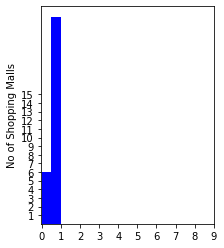

In [162]:
#Displaying the different bins
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x=df5['Labels']
num_bins = num_clusters
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=1)
plt.subplots_adjust(left=.5)
plt.xticks(range(0, 10))
plt.yticks(range(1, 16))
plt.ylabel('No of Shopping Malls')
plt.show()
%matplotlib inline

In [163]:
#Checking the centroid values by averaging the features of each cluster
df5.groupby('Labels').mean()

,distance,Like
Labels,,
0,3564.833333,93.166667
1,623.750000,11.541667


In [164]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [165]:
k_means_cluster_centers = k_means.cluster_centers_
pd.DataFrame(k_means_cluster_centers)

,0,1
0,1.525438,1.279872
1,-0.381360,-0.319968


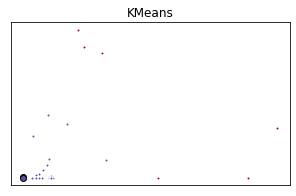

In [166]:
# Plotting library
import matplotlib.pyplot as plt 

#Backend for rendering plots within the browser
%matplotlib inline 

#Initializing the plot with specified dimensions.
fig = plt.figure(figsize=(5, 3))

#Colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#Create a plot
ax = fig.add_subplot(1, 1, 1)

#Loop through the data and plot the datapoints and centroids.
#K will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[-1.5,1],[1,3],[3,6]])), colors):

    #Create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    #Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    #Plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    #Plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

#Title of the plot
ax.set_title('KMeans')

#Remove x-axis ticks
ax.set_xticks(())

#Remove y-axis ticks
ax.set_yticks(())

#Show the plot
plt.show()
%matplotlib inline

In [167]:
#Name of shopping malls in cluster 0
df5.loc[df5['Labels']==0]

,name,distance,Like,Labels
27,Huynh Restaurant,1442,183,0
7,Kim Son Restaurant - Downtown,1610,161,0
9,Cuchara Restaurant,2092,154,0
0,Shiva Indian Restaurant,6724,61,0
6,Indian Summer Lodge,3569,0,0
24,Indian Hair Tx,5952,0,0


In [168]:
#Name of shopping malls in cluster 1
df5.loc[df5['Labels']==1]

,name,distance,Like,Labels
2,Andalucia Tapas Restaurant and Bar,659,78,1
20,The Fish Restaurant & Sushi Bar,1154,66,1
1,Spindletop Restaurant at Hyatt Regency Houston,259,52,1
10,House of Blues Restaurant & Bar,691,23,1
29,Njoy Thai Restaurant,2196,22,1
16,Aquarium Restaurant,632,16,1
21,Padthai Thai Restaurant,532,10,1
19,Trofi Restaurant,405,4,1
18,R.K.G. New Orleans Cajun Po-Boy Restaurant,338,3,1
28,The Pearl Restaurant & Bar,729,2,1


In [169]:
#Name of shopping malls in cluster 2
df5.loc[df5['Labels']==2]

,name,distance,Like,Labels


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


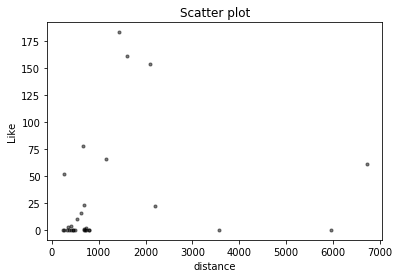

In [170]:
#Scatter plot
a = df5.distance
b = df5.Like
colors = (0,0,0)
area = np.pi*3

plt.scatter(a, b, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('distance')
plt.ylabel('Like')
plt.show()
%matplotlib inline

In [171]:
#Importing librarires for various other plots
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs

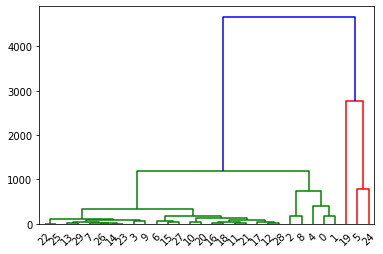

In [172]:
#Hierarchy plot
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt
X = df5.iloc[:, [1, 2]].values
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))
